In [2]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
# from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os


In [3]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
# (X_train, y_train), (X_test, y_test) = mnist.load_data(os.path.join(os.getcwd(), 'datasets/mnist.npz'))
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.min(), X_train.max()

(0, 255)

In [6]:
X_train.dtype

dtype('uint8')

# Method 1: 類別無大小關係 -> 最終輸出為各label的機率分配
## loss='categorical_crossentropy' (輸出one-hot-encoding )

In [7]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
# model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=256, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2)) # 可加可不加!
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [8]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# 將 output 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000000100，即第8個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

In [11]:
y_TrainOneHot[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
# 將 input 資料轉為2維
X_train_2D = X_train.reshape(X_train.shape[0], -1).astype('float32')  
X_test_2D = X_test.reshape(X_test.shape[0], -1).astype('float32')  

X_Train_norm = X_train_2D / 255
X_Test_norm = X_test_2D / 255
X_Train_norm.shape

(60000, 784)

In [13]:
60000 * (1 - 0.2) == 800 * 60

True

In [14]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)

Epoch 1/10
60/60 - 1s - loss: 1.0054 - accuracy: 0.7397 - val_loss: 0.3439 - val_accuracy: 0.9020
Epoch 2/10
60/60 - 0s - loss: 0.3589 - accuracy: 0.8955 - val_loss: 0.2563 - val_accuracy: 0.9267
Epoch 3/10
60/60 - 0s - loss: 0.2738 - accuracy: 0.9209 - val_loss: 0.2037 - val_accuracy: 0.9420
Epoch 4/10
60/60 - 0s - loss: 0.2203 - accuracy: 0.9377 - val_loss: 0.1695 - val_accuracy: 0.9518
Epoch 5/10
60/60 - 0s - loss: 0.1823 - accuracy: 0.9475 - val_loss: 0.1483 - val_accuracy: 0.9572
Epoch 6/10
60/60 - 0s - loss: 0.1537 - accuracy: 0.9563 - val_loss: 0.1341 - val_accuracy: 0.9604
Epoch 7/10
60/60 - 0s - loss: 0.1318 - accuracy: 0.9620 - val_loss: 0.1187 - val_accuracy: 0.9640
Epoch 8/10
60/60 - 0s - loss: 0.1191 - accuracy: 0.9647 - val_loss: 0.1106 - val_accuracy: 0.9663
Epoch 9/10
60/60 - 0s - loss: 0.1015 - accuracy: 0.9705 - val_loss: 0.1027 - val_accuracy: 0.9691
Epoch 10/10
60/60 - 0s - loss: 0.0903 - accuracy: 0.9729 - val_loss: 0.0987 - val_accuracy: 0.9710


In [15]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
train_history.history['accuracy']

[0.7396666407585144,
 0.895479142665863,
 0.9208541512489319,
 0.937666654586792,
 0.9475416541099548,
 0.956291675567627,
 0.9619791507720947,
 0.9646875262260437,
 0.9705208539962769,
 0.9728541374206543]

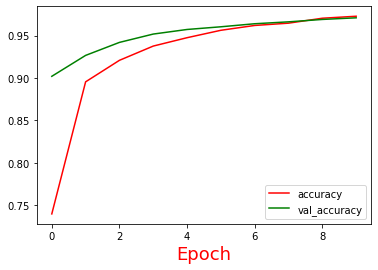

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_history.history['accuracy'], 'r', label = 'accuracy')
plt.plot(train_history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='lower right')

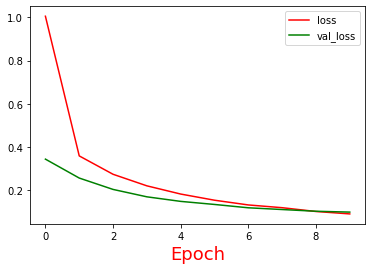

In [18]:
plt.plot(train_history.history['loss'], 'r', label = 'loss')
plt.plot(train_history.history['val_loss'], 'g', label = 'val_loss')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='upper right')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (800, 256)                200960    
_________________________________________________________________
dense_1 (Dense)              (800, 64)                 16448     
_________________________________________________________________
dropout (Dropout)            (800, 64)                 0         
_________________________________________________________________
dense_2 (Dense)              (800, 10)                 650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_Test_norm, y_TestOneHot)  
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 0s 913us/step - loss: 0.0944 - accuracy: 0.9711

	[Info] Accuracy of testing data = 97.1%


In [22]:
# 預測(prediction)
X = X_Test_norm
# predictions = model.predict_classes(X)
predictions = np.argmax(model.predict(X), axis=1)
# get prediction result
print('prediction:', predictions[:20])
print('actual    :', y_test[:20])

prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [24]:
# 機率分配
# predictions_proba = model.predict_proba(X) # will be removed after 2021-01-01.
predictions_proba = model.predict(X)
print(predictions_proba[:20])
print('-' * 30)
print(np.sum(predictions_proba[:20], axis=1))
print('-' * 30)
print(np.argmax(predictions_proba[:20], axis = -1))
print('-' * 30)
print(np.argmax(predictions_proba[:20], axis = 1))

[[7.89534897e-06 9.65842446e-07 2.86457449e-04 2.18898407e-03
  1.83688016e-08 1.95275570e-05 1.54367949e-10 9.97436345e-01
  5.85077146e-07 5.92562465e-05]
 [1.74041850e-06 1.12779555e-03 9.98317242e-01 4.87563026e-04
  1.11699772e-09 3.97776603e-07 7.40603241e-07 1.87838054e-06
  6.27040863e-05 9.51020818e-10]
 [2.04639655e-05 9.93327975e-01 5.17297129e-04 2.78965337e-04
  3.65128275e-04 4.42207165e-05 6.96567149e-05 4.86814976e-03
  4.21686884e-04 8.65146721e-05]
 [9.99364078e-01 2.35389916e-06 4.06942527e-05 2.16656008e-06
  2.80638551e-06 2.18851346e-05 1.13676993e-04 3.65524087e-04
  1.04780884e-06 8.56232364e-05]
 [2.00278464e-05 1.43416228e-05 1.74487686e-05 1.70183444e-06
  9.95672226e-01 7.58374426e-07 7.17403645e-06 5.31608355e-04
  2.85811366e-05 3.70624778e-03]
 [1.34053403e-06 9.94523168e-01 3.83136248e-05 4.69689840e-05
  6.33778691e-05 8.33055367e-07 5.56401346e-07 5.28227305e-03
  2.30567093e-05 2.01646508e-05]
 [1.25318127e-06 3.09751631e-05 9.02106706e-07 1.22194970e

(28, 28)


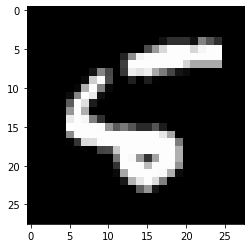

In [27]:
# 顯示錯誤的資料圖像
X2 = X_test[8,:,:]
print(X2.shape)
plt.imshow(X2, cmap = plt.get_cmap('gray'))
# plt.imshow(X2)
# plt.imshow(X2, cmap = plt.get_cmap('binary'))
plt.show()

In [28]:
prob = model.predict(X)
print(prob)

[[7.8953490e-06 9.6584245e-07 2.8645745e-04 ... 9.9743634e-01
  5.8507715e-07 5.9256246e-05]
 [1.7404185e-06 1.1277955e-03 9.9831724e-01 ... 1.8783805e-06
  6.2704086e-05 9.5102082e-10]
 [2.0463965e-05 9.9332798e-01 5.1729713e-04 ... 4.8681498e-03
  4.2168688e-04 8.6514672e-05]
 ...
 [1.9555353e-08 1.8164600e-08 9.8213526e-09 ... 3.0498721e-05
  2.3003582e-05 8.7434950e-04]
 [2.1027709e-08 1.4353813e-06 8.5125962e-11 ... 4.0550066e-08
  4.4666565e-05 2.6357256e-08]
 [9.6163308e-07 2.6501072e-08 2.7753623e-07 ... 9.1502267e-10
  4.2668916e-07 1.2858552e-10]]


In [29]:
prob[8]

array([1.13353122e-03, 6.61720347e-04, 5.51750557e-03, 4.79488044e-05,
       2.37010815e-03, 1.77793607e-01, 8.04484606e-01, 1.05423915e-05,
       7.81676732e-03, 1.63584322e-04], dtype=float32)

In [31]:
np.argmax(prob[8])

6

In [32]:
prob[0]

array([7.8953490e-06, 9.6584245e-07, 2.8645745e-04, 2.1889841e-03,
       1.8368802e-08, 1.9527557e-05, 1.5436795e-10, 9.9743634e-01,
       5.8507715e-07, 5.9256246e-05], dtype=float32)

In [33]:
np.argmax(prob[0])

7

In [34]:
model.save('20200830.h5')

# # Method 2: 類別有大小關係 -> 最終輸出為1個數值
## loss='sparse_categorical_crossentropy' (輸出1個數值)

In [35]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
# model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=256, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2)) # 可加可不加!
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [36]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_Train_norm, y=y_train, validation_split=0.2, epochs=10, batch_size=800, verbose=2)

Epoch 1/10
60/60 - 1s - loss: 1.0285 - accuracy: 0.7236 - val_loss: 0.3391 - val_accuracy: 0.9070
Epoch 2/10
60/60 - 0s - loss: 0.3451 - accuracy: 0.8997 - val_loss: 0.2403 - val_accuracy: 0.9328
Epoch 3/10
60/60 - 0s - loss: 0.2611 - accuracy: 0.9247 - val_loss: 0.1996 - val_accuracy: 0.9423
Epoch 4/10
60/60 - 0s - loss: 0.2130 - accuracy: 0.9386 - val_loss: 0.1671 - val_accuracy: 0.9517
Epoch 5/10
60/60 - 0s - loss: 0.1771 - accuracy: 0.9492 - val_loss: 0.1463 - val_accuracy: 0.9574
Epoch 6/10
60/60 - 0s - loss: 0.1531 - accuracy: 0.9562 - val_loss: 0.1343 - val_accuracy: 0.9624
Epoch 7/10
60/60 - 0s - loss: 0.1351 - accuracy: 0.9610 - val_loss: 0.1237 - val_accuracy: 0.9632
Epoch 8/10
60/60 - 0s - loss: 0.1190 - accuracy: 0.9645 - val_loss: 0.1138 - val_accuracy: 0.9659
Epoch 9/10
60/60 - 0s - loss: 0.1042 - accuracy: 0.9697 - val_loss: 0.1114 - val_accuracy: 0.9660
Epoch 10/10
60/60 - 0s - loss: 0.0947 - accuracy: 0.9726 - val_loss: 0.1015 - val_accuracy: 0.9692


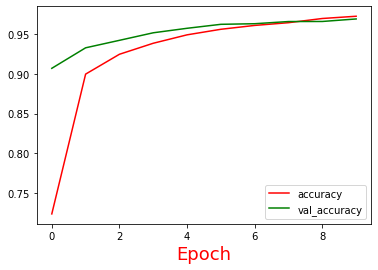

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_history.history['accuracy'], 'r', label = 'accuracy')
plt.plot(train_history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='lower right')

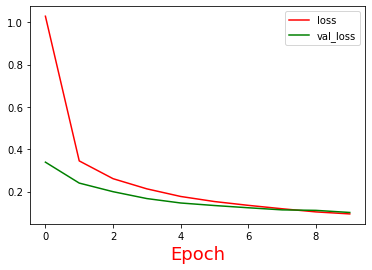

In [39]:
plt.plot(train_history.history['loss'], 'r', label = 'loss')
plt.plot(train_history.history['val_loss'], 'g', label = 'val_loss')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='upper right')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (800, 256)                200960    
_________________________________________________________________
dense_4 (Dense)              (800, 64)                 16448     
_________________________________________________________________
dropout_1 (Dropout)          (800, 64)                 0         
_________________________________________________________________
dense_5 (Dense)              (800, 10)                 650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_Test_norm, y_test)  
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 0s 923us/step - loss: 0.0989 - accuracy: 0.9704

	[Info] Accuracy of testing data = 97.0%
